## **Project 4. Student Performance**
> **(Team 9) Rachel Schoen, Andrea Wu, Mahind Rao, Mahalel Peter**

### I. **Introduction**
* *   * * 

For this project, we sought to explore a means to analyze and predict student performance based off a multitude of different variables, including but not limited to: attendance, taking notes, reading frequency, transporation, scholarships, and even parental status.

In other words:

> **What are the key factors that influence the success of a student?**


- How do students with additional work responsibilities fare academically compared to those without?
- How does the type of accommodation affect students' study habits and performance?
- How does discussion and group work influence students' interest and success in their courses?
- Can we predict a student’s academic performance (e.g., grade point average or success in courses) based on their personal background, study habits, and extracurricular activities?

* *   * * 
We decided to approach the topic in the following outline:

#### A. **Exploratory Data Analysis**
  - Create basic visualizations to observe any trends or patterns using Matplotlib or Tableau.
  - Create some sort of interactivity with the graphs, using HTML or otherwise.

#### B. **SQL Database**
  - Populate a SQL database using the CSV file, then connect to the database in order to continue analysis and predictions.

#### C. **Data Modeling**
  - Create a relational data model, or a graph data model.
  - Use supervised learning.
  - Create a Logistic Regression model.

#### D. **Model Optimization and Evaluation**
  - Try using a different number of layers, activations, optimizers, and epochs to maximize the accuracy of our model.
  - Try splitting the data to optimize the model.
  - Try using the Adam algorithm with our model for further optimization.
  - Evaluate the model's performance by creating a confusion matrix and/or a classification report.

  

### II. **Exploratory Data Analysis**
* *   * * 

To start with, we decided to manually clean the data via Excel, removing any columns that we deemed unnecessary or difficult to draw strong conclusions from. 

From there, we performed an exploratory data analysis— some basic observations by reading the CSV file directly in order to visualize the story a little more.

In [180]:
# Import libraries
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")


In [181]:
import pandas as pd
performance = pd.read_csv('Resources/StudentsPerformance_with_headers.csv', encoding='ISO-8859-1', low_memory=False)
performance.head()


,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,ReadingScientific,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,2,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,1,2,1,2,2,2,1


In [182]:
# Define the file path
path = Path('Resources/StudentsPerformance_with_headers.csv')

# Read the CSV file into DataFrame
master_df = pd.read_csv(path)

master_df


,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,ReadingScientific,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,2,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,2,1,1,1,1,1,2,1,2,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,2,2,1,2,1,1,3,2,2,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,2,1,1,1,1,1,3,3,2,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,1,1,1,2,1,2,1,2,4


In [183]:
master_df.dtypes
master_df['Grade'] = pd.to_numeric(master_df['Grade'])
master_df.dtypes


StudentID                   object
StudentAge                   int64
Sex                          int64
GraduatedHighSchoolType      int64
ScholarshipType              int64
AdditionalWork               int64
ArtisticOrSportsActivity     int64
HasPartner                   int64
TotalSalary                  int64
Transportation               int64
MothersEducation             int64
FathersEducation             int64
NumberOfSiblings             int64
ParentalStatus               int64
WeeklyStudyHours             int64
ReadingNonScientific         int64
ReadingScientific            int64
SeminarAttendance            int64
ProjectImpact                int64
ClassAttendance              int64
MidtermPrepAloneOrGroup      int64
MidtermPrepTimeSpent         int64
NoteTaking                   int64
ListeningInClass             int64
DiscussionInterest           int64
Grade                        int64
dtype: object

In [184]:
# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
master_df['Grade_Label'] = master_df['Grade'].map(grade_mapping)
master_df


,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade,Grade_Label
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,1,1,1,3,2,1,1,DD
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,1,1,1,3,2,3,1,DD
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,1,1,1,2,2,1,1,DD
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,1,1,1,2,3,2,2,1,DD
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,2,1,2,2,2,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,1,1,1,2,1,2,5,BB
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,2,1,2,1,1,3,2,2,5,BB
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,1,1,1,3,3,2,1,DD
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,1,1,2,1,2,1,2,4,CB


In [185]:
# Get the frequency count of each grade
grade_summary = master_df['Grade'].value_counts()

# Sort by the index (grades)
sorted_grade_summary = grade_summary.sort_index()

# Convert to DataFrame for display purposes
grade_summary_df = sorted_grade_summary.reset_index()
grade_summary_df.columns = ['Grade', 'Count']

# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
grade_summary_df['Grade_Label'] = grade_summary_df['Grade'].map(grade_mapping)

print(grade_summary_df)


   Grade  Count Grade_Label
0      0      8        Fail
1      1     35          DD
2      2     24          DC
3      3     21          CC
4      4     10          CB
5      5     17          BB
6      6     13          BA
7      7     17          AA


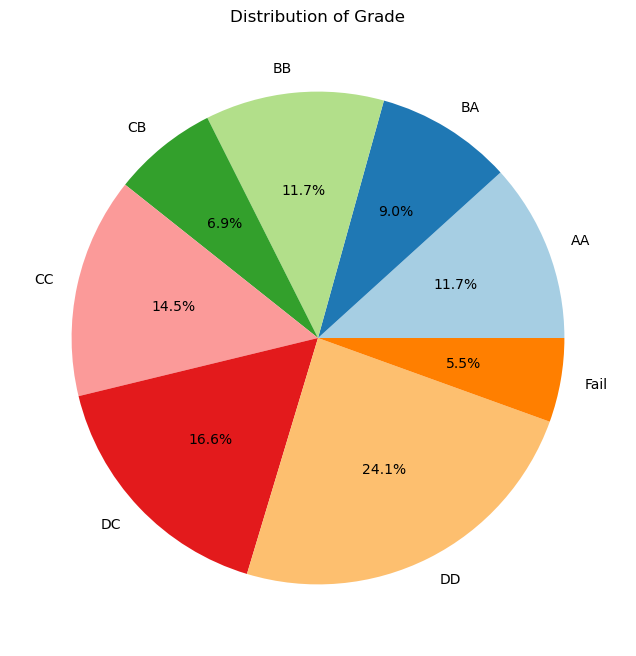

In [186]:
# Get the count of each grade label
grade_counts = master_df['Grade_Label'].value_counts()

# Define the desired order
grade_order = ['AA', 'BA', 'BB', 'CB', 'CC', 'DC', 'DD', 'Fail']

# Reorder the counts according to the defined order
ordered_grade_counts = grade_counts.reindex(grade_order, fill_value=0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ordered_grade_counts, labels=ordered_grade_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(ordered_grade_counts))))

# Add title
plt.title('Distribution of Grade')

# Show the plot
plt.show()


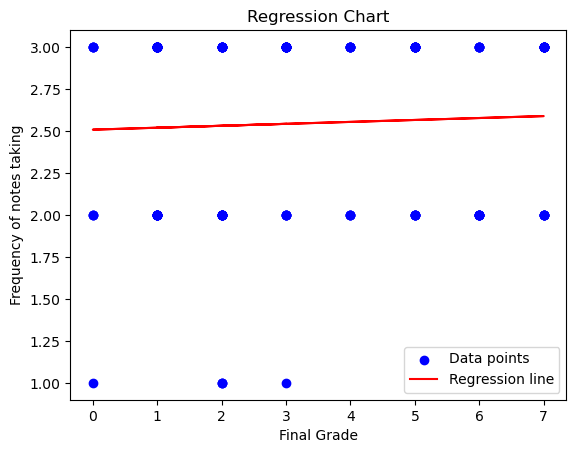

In [187]:
#Run regression on taking notes in class and Final Grades

X = master_df['Grade'].values.reshape(-1, 1)  
y = master_df['NoteTaking'].values 

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

# Plot the data points (scatter plot)
plt.scatter(master_df['Grade'], master_df['NoteTaking'], color='blue', label='Data points')

# Plot the regression line
plt.plot(master_df['Grade'], y_pred, color='red', label='Regression line')

# Add title and labels
plt.title('Regression Chart')
plt.xlabel('Final Grade')
plt.ylabel('Frequency of notes taking')
plt.legend()

# Show the plot
plt.show()


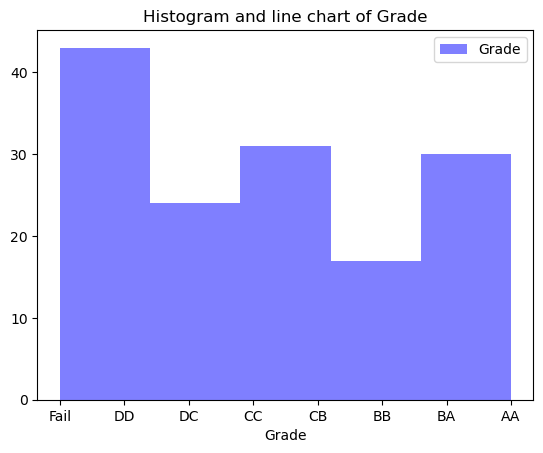

In [188]:
# Create a histogram for both variables
plt.hist(master_df['Grade'], bins=5, color='blue', alpha=0.5, label='Grade')


# Add title and labels
plt.title('Histogram and line chart of Grade')
plt.xlabel('Grade')

# Update tick labels for x-axis
grade_labels = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']
plt.xticks(ticks=range(len(grade_labels)), labels=grade_labels)

# Add legend
plt.legend()

# Show the plot
plt.show()


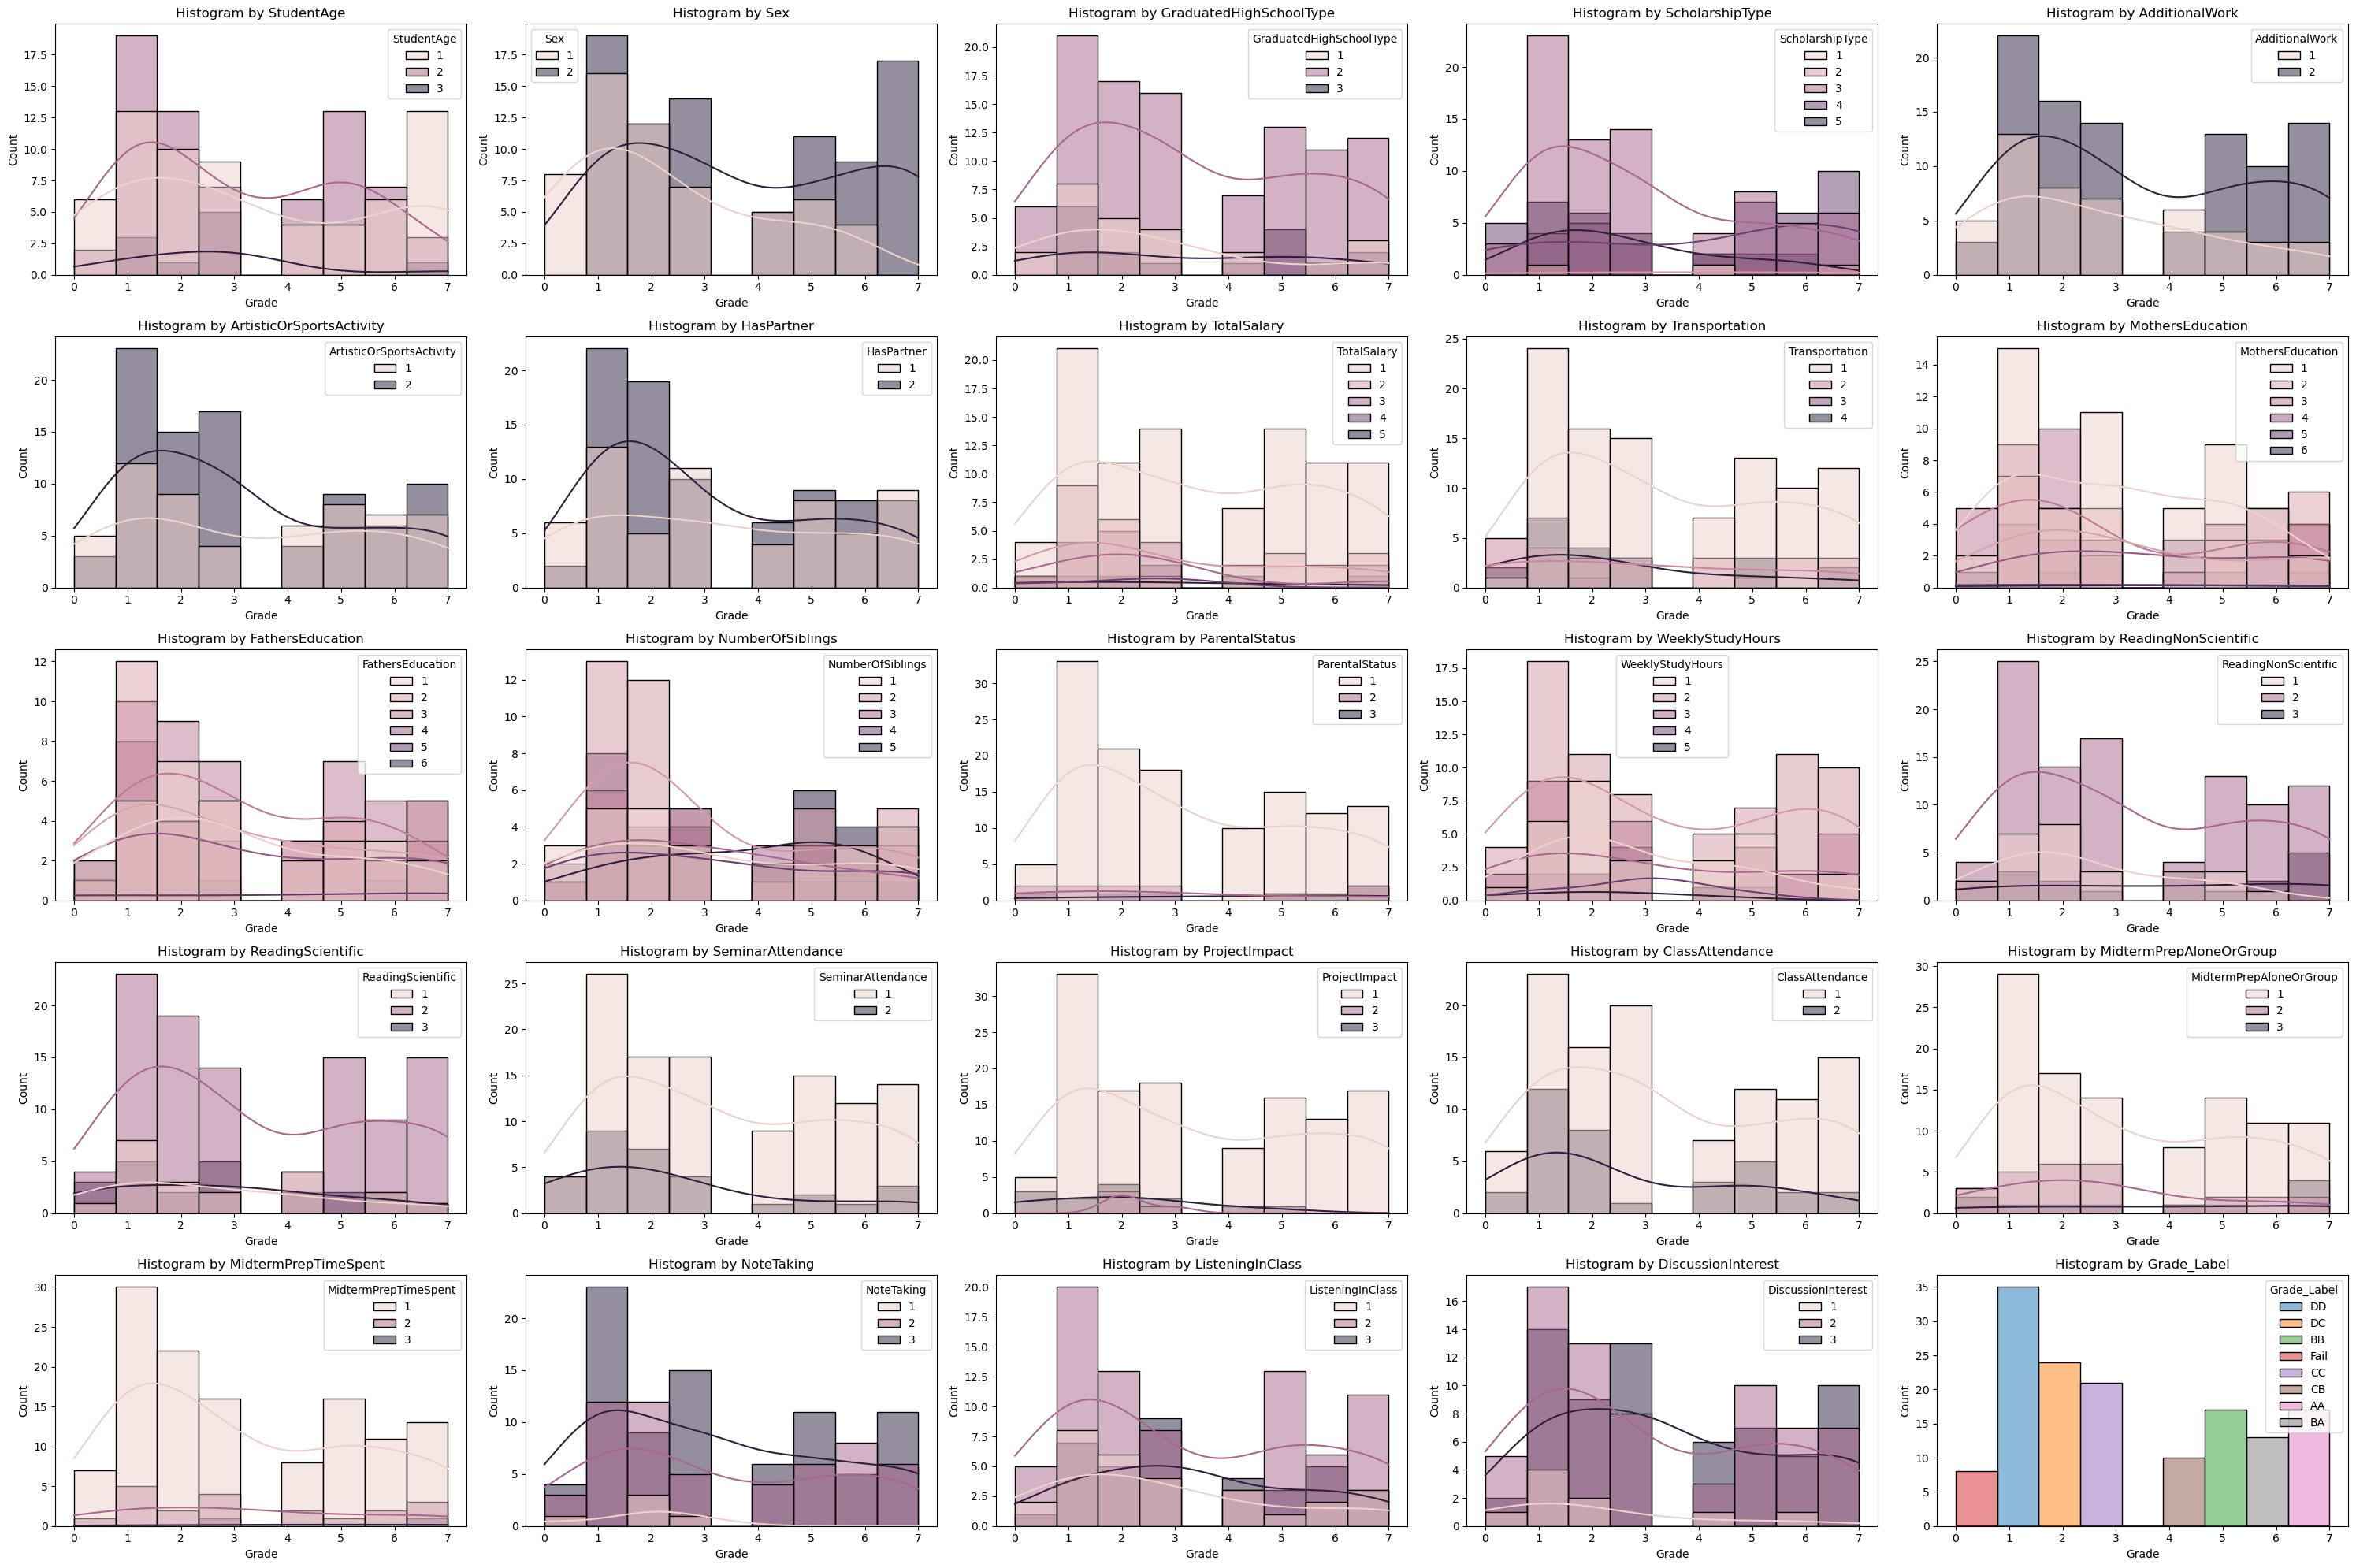

In [189]:
# Define the column to use as the x-axis value
x_column = 'Grade'

# Define the columns to exclude 
exclude_columns = [x_column, 'StudentID']

# Define the columns to use as hue 
columns = [col for col in master_df.columns if col not in exclude_columns]

# Calculate number of subplots
num_columns = len(columns)
num_rows = (num_columns // 5) + (num_columns % 5 != 0)  # Calculate rows needed


# Set up the figure
plt.figure(figsize=(30, 20))

# Iterate over hue columns and create subplots
for i, hue_column in enumerate(columns):
    plt.subplot(num_rows, 5, i + 1)
    # Plot histogram with hue
    ax = sns.histplot(master_df, x=x_column, hue=hue_column, kde=True, alpha=0.5)
    plt.title(f'Histogram by {hue_column}')
    
    # Explicitly handle legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles=handles, labels=labels, title=hue_column)

plt.tight_layout()
plt.show()


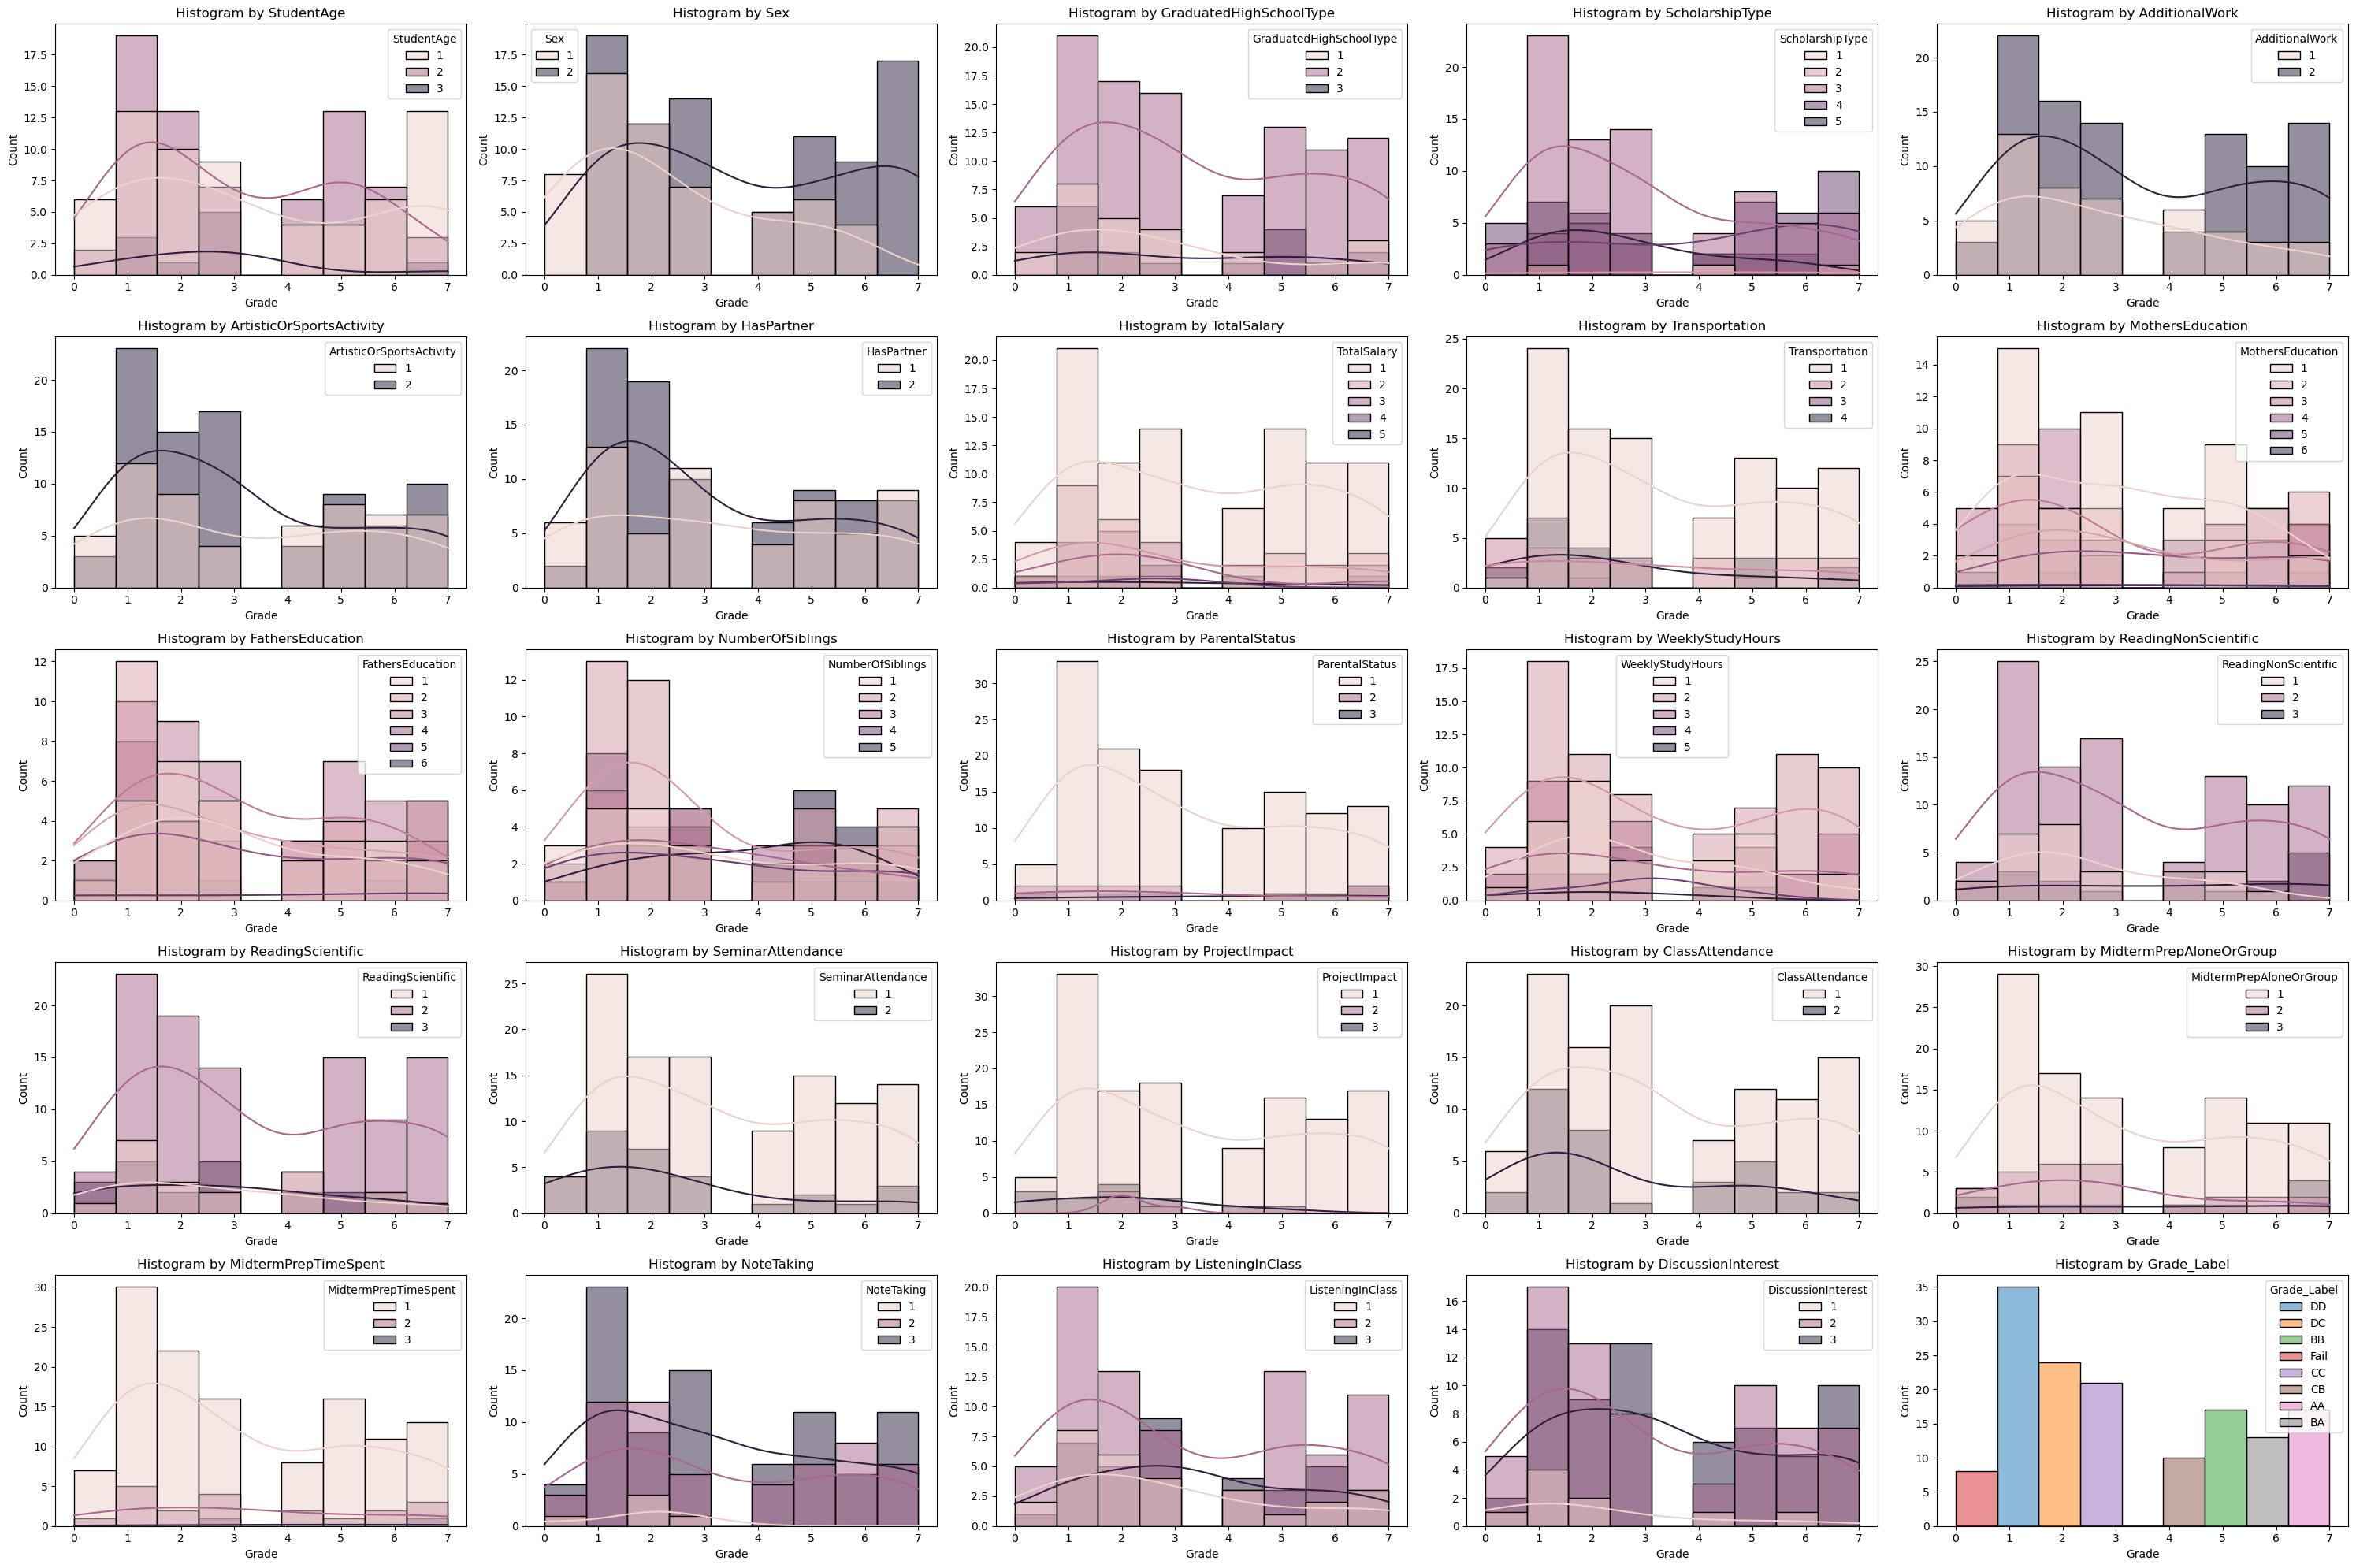

In [190]:
# Define the column to use as the x-axis value
x_column = 'Grade'

# Define the columns to exclude 
exclude_columns = [x_column, 'StudentID']

# Define the columns to use as hue 
columns = [col for col in master_df.columns if col not in exclude_columns]

# Calculate number of subplots
num_columns = len(columns)
num_rows = (num_columns // 5) + (num_columns % 5 != 0)  # Calculate rows needed


# Set up the figure
plt.figure(figsize=(30, 20))

# Iterate over hue columns and create subplots
for i, hue_column in enumerate(columns):
    plt.subplot(num_rows, 5, i + 1)
    # Plot histogram with hue
    ax = sns.histplot(master_df, x=x_column, hue=hue_column, kde=True, alpha=0.5)
    plt.title(f'Histogram by {hue_column}')
    
    # Explicitly handle legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles=handles, labels=labels, title=hue_column)

plt.tight_layout()
plt.show()


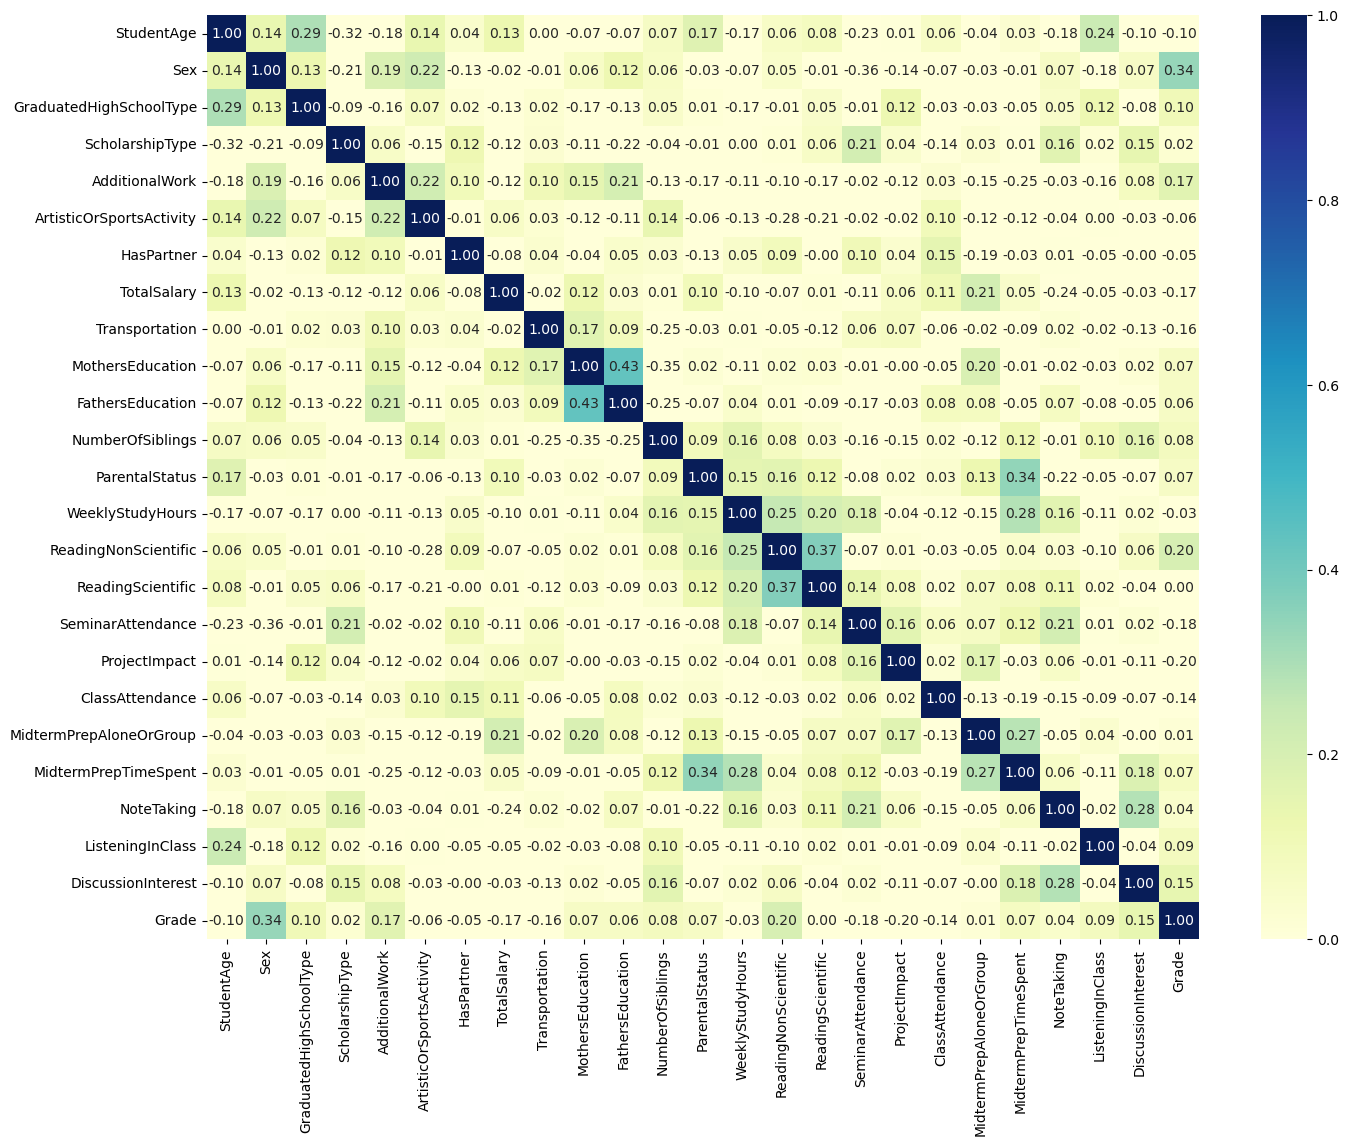

In [191]:
plt.figure(figsize=(16, 12))
sns.heatmap(master_df.drop(['StudentID','Grade_Label'], axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

plt.show()


### III. **Database Design & Implementation**
* *   * * 

The following is the ERDV diagram of our database.

![ERDV](https://i.imgur.com/jvNpA4e.png)

There are 4 tables in total for this database:



1. **Students**
2. **StudentActivities**
3. **AcademicPerformance**
4. **FamilyBackground**


Each table holds information pertinent to the overarching question of student performance.

The following is the breakdown for each table, including some reasons for choosing to keep the information we did.


> **`Students`**

- the primary table, and the center of the data, as it is the main focus of the analysis.
- this is where the most primary key is stored: the key that all foreign keys use as reference.
- textextextext

> **`StudentActivities`**

- textextextext
- textextextext
- textextextext

> **`AcademicPerformance`**

- textextextext
- textextextext
- textextextext

> **`FamilyBackground`**

- textextextext
- textextextext
- textextextext

With the database built and stored in a .sqlite file, we can now connect to it via sqlalchemy in order to further perform analysis.

In [192]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd


In [193]:
# First create an engine to project4.sqlite.
engine = create_engine("sqlite:///Resources/Project4.sqlite")

# Reflect an existing database into a new model using automap_base.
Base = automap_base()
# Reflect the tables.
Base.prepare(engine)

# Viewing all of the classes that automap found.
Base.classes.keys()


['familybackground', 'students', 'studentactivities', 'academicperformance']

In [194]:
studentactivities_base = Base.classes.studentactivities
familybackground_base = Base.classes.familybackground
academicperformance_base = Base.classes.academicperformance
students_base = Base.classes.students


In [195]:
# Create our session (the link) from Python to the database.
session = Session(engine)


In [196]:
# Linking each dataset to a dataframe via the session query

students_dataset = session.query(students_base.studentid, students_base.studentage, students_base.sex, students_base.graduatedhighschooltype, students_base.scholarshiptype)
studentactivities_dataset = session.query(studentactivities_base.activityid, studentactivities_base.studentid, studentactivities_base.additionalwork, studentactivities_base.artisticorsportsactivity, studentactivities_base.haspartner, studentactivities_base.transportation, studentactivities_base.weeklystudyhours)
familybackground_dataset = session.query(familybackground_base.backgroundid, familybackground_base.studentid, familybackground_base.motherseducation, familybackground_base.fatherseducation, familybackground_base.numberofsiblings, familybackground_base.parentalstatus, familybackground_base.totalsalary)
academicperformance_dataset = session.query(academicperformance_base.performanceid, academicperformance_base.studentid, academicperformance_base.seminarattendance, academicperformance_base.projectimpact, academicperformance_base.classattendance, academicperformance_base.midtermprepaloneorgroup, academicperformance_base.midtermpreptimespent, academicperformance_base.notetaking, academicperformance_base.listeninginclass, academicperformance_base.discussioninterest, academicperformance_base.grade)


In [197]:
students_df = pd.DataFrame(students_dataset)
students_df


,studentid,studentage,sex,graduatedhighschooltype,scholarshiptype
0,STUDENT1,2,2,3,3
1,STUDENT2,2,2,3,3
2,STUDENT3,2,2,2,3
3,STUDENT4,1,1,1,3
4,STUDENT5,2,2,1,3
...,...,...,...,...,...
140,STUDENT141,2,1,2,3
141,STUDENT142,1,1,2,4
142,STUDENT143,1,1,1,4
143,STUDENT144,2,1,2,4


In [198]:
studentactivities_df = pd.DataFrame(studentactivities_dataset)
studentactivities_df


,activityid,studentid,additionalwork,artisticorsportsactivity,haspartner,transportation,weeklystudyhours
0,1,STUDENT1,1,2,2,1,3
1,2,STUDENT2,1,2,2,1,2
2,3,STUDENT3,2,2,2,4,2
3,4,STUDENT4,1,2,1,1,3
4,5,STUDENT5,2,2,1,1,2
...,...,...,...,...,...,...,...
140,141,STUDENT141,1,1,2,1,3
141,142,STUDENT142,2,2,2,4,3
142,143,STUDENT143,2,2,2,1,2
143,144,STUDENT144,1,1,1,2,2


In [199]:
familybackground_df = pd.DataFrame(familybackground_dataset)
familybackground_df


,backgroundid,studentid,motherseducation,fatherseducation,numberofsiblings,parentalstatus,totalsalary
0,1,STUDENT1,1,2,3,1,1
1,2,STUDENT2,2,3,2,1,1
2,3,STUDENT3,2,2,2,1,2
3,4,STUDENT4,1,2,5,1,2
4,5,STUDENT5,3,3,2,1,3
...,...,...,...,...,...,...,...
140,141,STUDENT141,1,2,2,2,1
141,142,STUDENT142,1,1,5,1,1
142,143,STUDENT143,3,4,4,1,1
143,144,STUDENT144,4,4,1,1,5


In [200]:
academicperformance_df = pd.DataFrame(academicperformance_dataset)
academicperformance_df


,performanceid,studentid,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
0,1,STUDENT1,1,1,1,1,1,3,2,1,1
1,2,STUDENT2,1,1,1,1,1,3,2,3,1
2,3,STUDENT3,1,1,1,1,1,2,2,1,1
3,4,STUDENT4,1,1,1,1,2,3,2,2,1
4,5,STUDENT5,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,STUDENT141,1,1,1,1,1,2,1,2,5
141,142,STUDENT142,2,1,2,1,1,3,2,2,5
142,143,STUDENT143,1,1,1,1,1,3,3,2,1
143,144,STUDENT144,1,1,1,2,1,2,1,2,4


In [201]:
dfs = [students_df, studentactivities_df, familybackground_df, academicperformance_df]
dfs = [df.set_index('studentid') for df in dfs]
student_performance = dfs[0].join(dfs[1:])


In [202]:
student_performance


,studentage,sex,graduatedhighschooltype,scholarshiptype,activityid,additionalwork,artisticorsportsactivity,haspartner,transportation,weeklystudyhours,...,performanceid,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
studentid,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,1,2,2,1,3,...,1,1,1,1,1,1,3,2,1,1
STUDENT2,2,2,3,3,2,1,2,2,1,2,...,2,1,1,1,1,1,3,2,3,1
STUDENT3,2,2,2,3,3,2,2,2,4,2,...,3,1,1,1,1,1,2,2,1,1
STUDENT4,1,1,1,3,4,1,2,1,1,3,...,4,1,1,1,1,2,3,2,2,1
STUDENT5,2,2,1,3,5,2,2,1,1,2,...,5,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,141,1,1,2,1,3,...,141,1,1,1,1,1,2,1,2,5
STUDENT142,1,1,2,4,142,2,2,2,4,3,...,142,2,1,2,1,1,3,2,2,5
STUDENT143,1,1,1,4,143,2,2,2,1,2,...,143,1,1,1,1,1,3,3,2,1


In [203]:
student_performance.reset_index(inplace=True)
student_performance


,studentid,studentage,sex,graduatedhighschooltype,scholarshiptype,activityid,additionalwork,artisticorsportsactivity,haspartner,transportation,...,performanceid,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
0,STUDENT1,2,2,3,3,1,1,2,2,1,...,1,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,2,1,2,2,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,3,2,2,2,4,...,3,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,4,1,2,1,1,...,4,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,5,2,2,1,1,...,5,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,141,1,1,2,1,...,141,1,1,1,1,1,2,1,2,5
141,STUDENT142,1,1,2,4,142,2,2,2,4,...,142,2,1,2,1,1,3,2,2,5
142,STUDENT143,1,1,1,4,143,2,2,2,1,...,143,1,1,1,1,1,3,3,2,1
143,STUDENT144,2,1,2,4,144,1,1,1,2,...,144,1,1,1,2,1,2,1,2,4


### IV. **Data Modeling**
* *   * * 

##### **1. Data Preparation**


Before we could load the data into tables, we first had to clean the datasets given to us. This was done already in the Exploratory Data Analysis step, but from there, we further eliminated any non-necessary elements in order to perform machine learning, most notably the dataset ids (performanceid, activityid, backgroundid) that were merged.
* *   * * 

To start with, we wanted to look at the correlation matrix between grades and the other variables.

In [204]:
import numpy as np

# data_cm = student_performance.copy()
# data_cm = data_cm.drop(['studentid'], axis=1)
# corr_fs = data_cm.corr()
# corr_fs_grade = corr_fs['grade']

# value_corr = 1.5*corr_fs_grade.mean()
# value_corr


It's a very low correlation, but perhaps we can find something else if we keep going.

In [205]:
# data_corr = student_performance.copy()
# data_corr = data_corr.drop('studentid', axis= 1)

# corr_ = data_corr.corr()['grade']
# columns_corr = [corr_fs_grade.index[i] for i, value in enumerate(corr_) if value > value_corr or value < - value_corr]
# columns_corr


### Creating model & model optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [217]:
# Drop the ID and label columns
df_for_model= student_performance.drop(columns=['studentid','performanceid'])
df_for_model.head()

,studentage,sex,graduatedhighschooltype,scholarshiptype,activityid,additionalwork,artisticorsportsactivity,haspartner,transportation,weeklystudyhours,...,totalsalary,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
0,2,2,3,3,1,1,2,2,1,3,...,1,1,1,1,1,1,3,2,1,1
1,2,2,3,3,2,1,2,2,1,2,...,1,1,1,1,1,1,3,2,3,1
2,2,2,2,3,3,2,2,2,4,2,...,2,1,1,1,1,1,2,2,1,1
3,1,1,1,3,4,1,2,1,1,3,...,2,1,1,1,1,2,3,2,2,1
4,2,2,1,3,5,2,2,1,1,2,...,3,1,1,1,2,1,2,2,2,1


In [218]:
# Split grade into 0 = below Grade C, 1 = Above Grade C
df_for_model['GradeC'] = np.where(df_for_model['grade'] <= 2, 0, 1)

# Drop useless columns, only keep columns seems to be correlated
columns_to_keep = ['additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 
                   'classattendance', 'discussioninterest', 'totalsalary', 'graduatedhighschooltype', 'GradeC']
df_for_model_encode = df_for_model[columns_to_keep]

# Convert categorical data to numeric using pd.get_dummies
df_for_model_encode = pd.get_dummies(df_for_model_encode, columns=['additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 'classattendance', 'discussioninterest', 'totalsalary','graduatedhighschooltype', 'GradeC'])

df_for_model_encode


,additionalwork_1,additionalwork_2,transportation_1,transportation_2,transportation_3,transportation_4,seminarattendance_1,seminarattendance_2,projectimpact_1,projectimpact_2,...,totalsalary_1,totalsalary_2,totalsalary_3,totalsalary_4,totalsalary_5,graduatedhighschooltype_1,graduatedhighschooltype_2,graduatedhighschooltype_3,GradeC_0,GradeC_1
0,True,False,True,False,False,False,True,False,True,False,...,True,False,False,False,False,False,False,True,True,False
1,True,False,True,False,False,False,True,False,True,False,...,True,False,False,False,False,False,False,True,True,False
2,False,True,False,False,False,True,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,True,False,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,True,False,True,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,True,False,True,False,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,True
141,False,True,False,False,False,True,False,True,True,False,...,True,False,False,False,False,False,True,False,False,True
142,False,True,True,False,False,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
143,True,False,False,True,False,False,True,False,True,False,...,False,False,False,False,True,False,True,False,False,True


In [219]:
# Split our preprocessed data into our features and target arrays
X = df_for_model_encode.drop(columns=['GradeC_0','GradeC_1'])
y = df_for_model_encode[['GradeC_1']]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [220]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Training the model - First Attempt

In [221]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Adjusted the model by increasing the number of neurons and added more hidden layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)               │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_247 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,851 (34.57 KB)

 Trainable params: 8,851 (34.57 KB)

 Non-trainable params: 0 (0.00 B)

In [222]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [223]:
# Train the model - Added the number of epochs to the training regimen
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4916 - loss: 0.6948  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6465 - loss: 0.6604 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.6726 - loss: 0.6307
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.7332 - loss: 0.6053
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.7406 - loss: 0.5904
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7475 - loss: 0.5706
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7620 - loss: 0.5454 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7913 - loss: 0.5267 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.5103 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7764 - loss: 0.5183 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8280 - loss: 0.4767
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8

In [224]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - 33ms/step - accuracy: 0.6216 - loss: 1.4425
Loss: 1.4424782991409302, Accuracy: 0.6216216087341309


### Model Optimization - Second Attempt

In [225]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Adjusted the model by increasing the number of neurons and added more hidden layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_250 (Dense)               │ (None, 200)            │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,541 (91.96 KB)

 Trainable params: 23,541 (91.96 KB)

 Non-trainable params: 0 (0.00 B)

In [226]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [227]:
# Train the model - Added the number of epochs to the training regimen
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5389 - loss: 0.7089  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.6971 - loss: 0.6427
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7637 - loss: 0.6080
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.5717 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.5375 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.5010 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.7810 - loss: 0.5153
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.4817 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8223 - loss: 0.4843
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8192 - loss: 0.4547
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8088 - loss: 0.4502 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.841

In [228]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - 28ms/step - accuracy: 0.6486 - loss: 1.2921
Loss: 1.2920701503753662, Accuracy: 0.6486486196517944


### Model Optimization - Third Attempt

In [229]:


# Drop useless columns, only keep columns seems to be correlated, adding sex 
columns_to_keep = ['sex','additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 
                   'classattendance', 'discussioninterest', 'totalsalary', 'graduatedhighschooltype', 'GradeC']
df_for_model_opt_encode = df_for_model[columns_to_keep]

# Convert categorical data to numeric using pd.get_dummies
df_for_model_opt_encode = pd.get_dummies(df_for_model_opt_encode, columns=['sex','additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 'classattendance', 'discussioninterest', 'totalsalary','graduatedhighschooltype', 'GradeC'])

df_for_model_opt_encode

,sex_1,sex_2,additionalwork_1,additionalwork_2,transportation_1,transportation_2,transportation_3,transportation_4,seminarattendance_1,seminarattendance_2,...,totalsalary_1,totalsalary_2,totalsalary_3,totalsalary_4,totalsalary_5,graduatedhighschooltype_1,graduatedhighschooltype_2,graduatedhighschooltype_3,GradeC_0,GradeC_1
0,False,True,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,False
1,False,True,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,False
2,False,True,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,True,False,True,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,True,False,True,True,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,True,False,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,True
141,True,False,False,True,False,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True
142,True,False,False,True,True,False,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False
143,True,False,True,False,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,True


In [230]:
# Split our preprocessed data into our features and target arrays
X = df_for_model_opt_encode.drop(columns=['GradeC_0','GradeC_1'])
y = df_for_model_opt_encode[['GradeC_1']]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [231]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [232]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Adjusted the model by increasing the number of neurons and added more hidden layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_254 (Dense)               │ (None, 200)            │         5,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,941 (93.52 KB)

 Trainable params: 23,941 (93.52 KB)

 Non-trainable params: 0 (0.00 B)

In [233]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [234]:
# Train the model - Added the number of epochs to the training regimen
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4970 - loss: 0.6932  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6874 - loss: 0.6358 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8024 - loss: 0.5976
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.5573 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.8505 - loss: 0.5118
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8578 - loss: 0.4813
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4799
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.4182 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.4082 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8605 - loss: 0.4112
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.8580 - loss: 0.4103
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8821 

In [235]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - 33ms/step - accuracy: 0.6216 - loss: 1.5155
Loss: 1.5155353546142578, Accuracy: 0.6216216087341309


In [236]:
# Export our model to HDF5 file
nn.save("Andrea_Optimization.h5")

### Results

The second attempt has the highest accuracy of 0.65. When I tried to add the most correlated column "Sex" to the model, the accuracy dropped.

### V. **Final Analysis & Further Considerations**
* *   * * 